# Monte Carlo

This notebook presents the monte carlo process used in the paper, and may be used to replicate the monte carlo results in Figures 7 and 8.

---

In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import fitle as fl
import vector

The following is a nominal error distribution associated with LHCb data recorded in late July. We simulate data by applying a Gaussian resolution with a random value from the MERR distribution on a true mass value.

In [2]:
f = uproot.open("../data/MERR.root")

In [3]:
Dp_DTF_MERR = f['DecayTree']["Dp_DTF_MERR"].array()

In [4]:
mu = 1970.
sigma = np.random.choice(Dp_DTF_MERR, 100000)
observed = np.multiply(sigma,np.random.randn(100000)) + mu

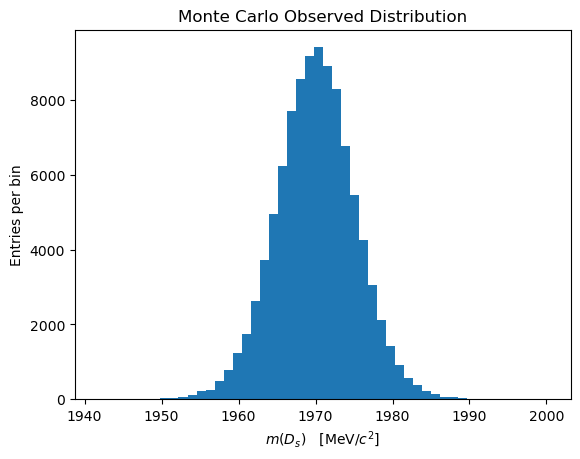

In [5]:
plt.hist(observed,bins=50)
plt.title('Monte Carlo Observed Distribution')
plt.ylabel('Entries per bin')
plt.xlabel('$m(D_s)$   [MeV/$c^2$]')
plt.show()

The next cells show fits of this observed distribution. It is not described well by a single-Gaussian resolution. Using a double-Gaussian radically improves the fit, and a triple-Gaussian's improvement is marginal. 

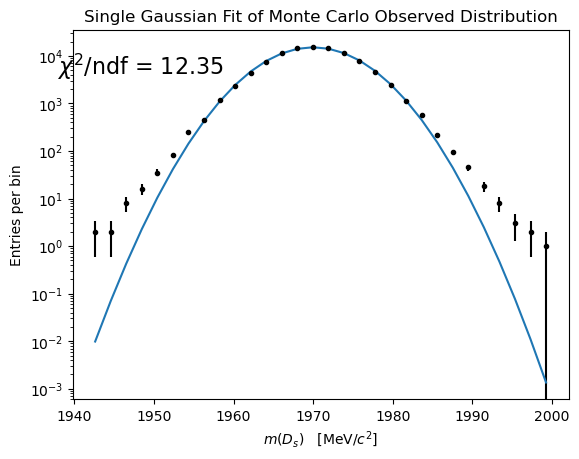

In [6]:
cost = fl.Cost.chi2(observed, 30, zero_method='absolute')
gauss = fl.Param.positive(100000) * fl.gaussian(mu=fl.Param(1950), sigma=fl.Param.positive(20))
fit = fl.fit(gauss | cost, numba=False)
plt.errorbar(cost.x(), cost.y(), linestyle='', marker='.', color='black', yerr=np.sqrt(cost.y()))
plt.plot(cost.x(), gauss(cost.x()))
plt.yscale('log')
plt.text(1938, 4*10**3, f'$\chi^2$/ndf = {fit.minimizer.fval/(len(cost.x())-len(fit.values)-1):.02f}', fontsize=16)
plt.title('Single Gaussian Fit of Monte Carlo Observed Distribution')
plt.ylabel('Entries per bin')
plt.xlabel('$m(D_s)$   [MeV/$c^2$]')
plt.show()

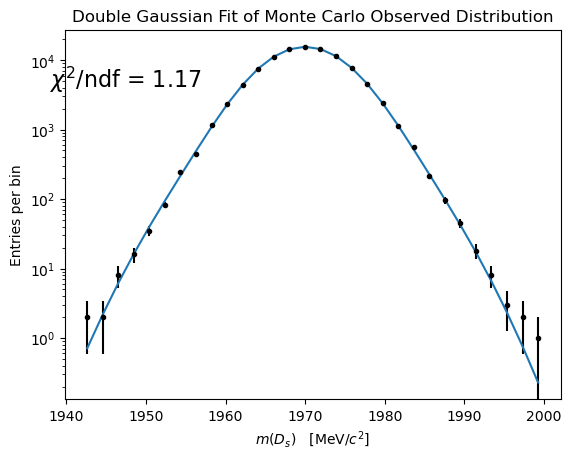

In [7]:
mu = fl.Param(1950)
gauss2 = fl.Param.positive(100000) * fl.gaussian(mu=mu, sigma=fl.Param.positive(20)) + fl.Param.positive(100000) * fl.gaussian(mu=mu, sigma=fl.Param.positive(20))
fit = fl.fit(gauss2 | cost, numba=False)
plt.errorbar(cost.x(), cost.y(), linestyle='', marker='.', color='black', yerr=np.sqrt(cost.y()))
plt.plot(cost.x(), gauss2(cost.x()))
plt.yscale('log')
plt.text(1938, 4*10**3, f'$\chi^2$/ndf = {fit.minimizer.fval/(len(cost.x())-len(fit.values)-1):.02f}', fontsize=16)
plt.title('Double Gaussian Fit of Monte Carlo Observed Distribution')
plt.ylabel('Entries per bin')
plt.xlabel('$m(D_s)$   [MeV/$c^2$]')
plt.show()

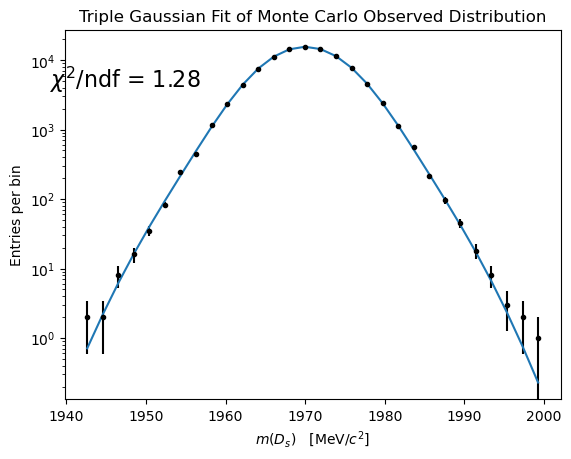

In [8]:
mu = fl.Param(1950)
gauss3 = fl.Param.positive(100000) * fl.gaussian(mu=mu, sigma=fl.Param.positive(20)) + fl.Param.positive(100000) * fl.gaussian(mu=mu, sigma=fl.Param.positive(20)) + fl.Param.positive(100000) * fl.gaussian(mu=mu, sigma=fl.Param.positive(20))
fit = fl.fit(gauss3 | cost, numba=False)
plt.errorbar(cost.x(), cost.y(), linestyle='', marker='.', color='black', yerr=np.sqrt(cost.y()))
plt.plot(cost.x(), gauss3(cost.x()))
plt.yscale('log')
plt.text(1938, 4*10**3, f'$\chi^2$/ndf = {fit.minimizer.fval/(len(cost.x())-len(fit.values) -1):.02f}', fontsize=16)
plt.title('Triple Gaussian Fit of Monte Carlo Observed Distribution')
plt.ylabel('Entries per bin')
plt.xlabel('$m(D_s)$   [MeV/$c^2$]')
plt.show()

## PHOTOS Data

PHOTOS is used to generate theoretical mass distributions accounting for photon radiation. A 500,000 entry subset of the 10,000,000 entry simulation is used here, and a pregenerated histogram of all data is used for fitting

In [9]:
Dp_tree=uproot.open("../data/mc/raw/Dp.root")["Truth"]["t"]

Dp_ssK_TRUEP_E = np.asarray(Dp_tree["ssK_TRUEP_E"])
Dp_ssK_TRUEP_X = np.asarray(Dp_tree["ssK_TRUEP_X"])
Dp_ssK_TRUEP_Y = np.asarray(Dp_tree["ssK_TRUEP_Y"])
Dp_ssK_TRUEP_Z = np.asarray(Dp_tree["ssK_TRUEP_Z"])

Dp_osK_TRUEP_E = np.asarray(Dp_tree["osK_TRUEP_E"])
Dp_osK_TRUEP_X = np.asarray(Dp_tree["osK_TRUEP_X"])
Dp_osK_TRUEP_Y = np.asarray(Dp_tree["osK_TRUEP_Y"])
Dp_osK_TRUEP_Z = np.asarray(Dp_tree["osK_TRUEP_Z"])

Dp_sspi_TRUEP_E = np.asarray(Dp_tree["sspi_TRUEP_E"])
Dp_sspi_TRUEP_X = np.asarray(Dp_tree["sspi_TRUEP_X"])
Dp_sspi_TRUEP_Y = np.asarray(Dp_tree["sspi_TRUEP_Y"])
Dp_sspi_TRUEP_Z = np.asarray(Dp_tree["sspi_TRUEP_Z"])

Dp_ssK_vec   = vector.array({"px": Dp_ssK_TRUEP_X, "py":Dp_ssK_TRUEP_Y, "pz":Dp_ssK_TRUEP_Z, "E":Dp_ssK_TRUEP_E})
Dp_osK_vec   = vector.array({"px": Dp_osK_TRUEP_X, "py":Dp_osK_TRUEP_Y, "pz":Dp_osK_TRUEP_Z, "E":Dp_osK_TRUEP_E})
Dp_sspi_vec  = vector.array({"px": Dp_sspi_TRUEP_X, "py":Dp_sspi_TRUEP_Y, "pz":Dp_sspi_TRUEP_Z, "E":Dp_sspi_TRUEP_E})

Dp_mother_vec = Dp_ssK_vec + Dp_osK_vec + Dp_sspi_vec
Dp_mother_mass = Dp_mother_vec.mass

In [10]:
Ds_tree=uproot.open("../data/mc/raw/Ds.root")["Truth"]["t"]

Ds_ssK_TRUEP_E = np.asarray(Ds_tree["ssK_TRUEP_E"])
Ds_ssK_TRUEP_X = np.asarray(Ds_tree["ssK_TRUEP_X"])
Ds_ssK_TRUEP_Y = np.asarray(Ds_tree["ssK_TRUEP_Y"])
Ds_ssK_TRUEP_Z = np.asarray(Ds_tree["ssK_TRUEP_Z"])

Ds_osK_TRUEP_E = np.asarray(Ds_tree["osK_TRUEP_E"])
Ds_osK_TRUEP_X = np.asarray(Ds_tree["osK_TRUEP_X"])
Ds_osK_TRUEP_Y = np.asarray(Ds_tree["osK_TRUEP_Y"])
Ds_osK_TRUEP_Z = np.asarray(Ds_tree["osK_TRUEP_Z"])

Ds_sspi_TRUEP_E = np.asarray(Ds_tree["sspi_TRUEP_E"])
Ds_sspi_TRUEP_X = np.asarray(Ds_tree["sspi_TRUEP_X"])
Ds_sspi_TRUEP_Y = np.asarray(Ds_tree["sspi_TRUEP_Y"])
Ds_sspi_TRUEP_Z = np.asarray(Ds_tree["sspi_TRUEP_Z"])

Ds_ssK_vec   = vector.array({"px": Ds_ssK_TRUEP_X, "py":Ds_ssK_TRUEP_Y, "pz":Ds_ssK_TRUEP_Z, "E":Ds_ssK_TRUEP_E})
Ds_osK_vec   = vector.array({"px": Ds_osK_TRUEP_X, "py":Ds_osK_TRUEP_Y, "pz":Ds_osK_TRUEP_Z, "E":Ds_osK_TRUEP_E})
Ds_sspi_vec  = vector.array({"px": Ds_sspi_TRUEP_X, "py":Ds_sspi_TRUEP_Y, "pz":Ds_sspi_TRUEP_Z, "E":Ds_sspi_TRUEP_E})

Ds_mother_vec = Ds_ssK_vec + Ds_osK_vec + Ds_sspi_vec
Ds_mother_mass = Ds_mother_vec.mass

## Monte Carlo data for $D \rightarrow K K \pi$ decay channel

With this data, we can create a sampling function to generate data

In [11]:
def sample():
    raw_data_dp = np.random.choice(Dp_mother_mass, size=800000) + np.multiply(np.random.choice(Dp_DTF_MERR,800000),np.random.randn(800000)) 
    raw_data_ds = np.random.choice(Ds_mother_mass, size=1000000) + np.multiply(np.random.choice(Dp_DTF_MERR,1000000),np.random.randn(1000000))
    background = np.random.exponential(150, 60000)+1840
    return np.concatenate([raw_data_dp,raw_data_ds,background])

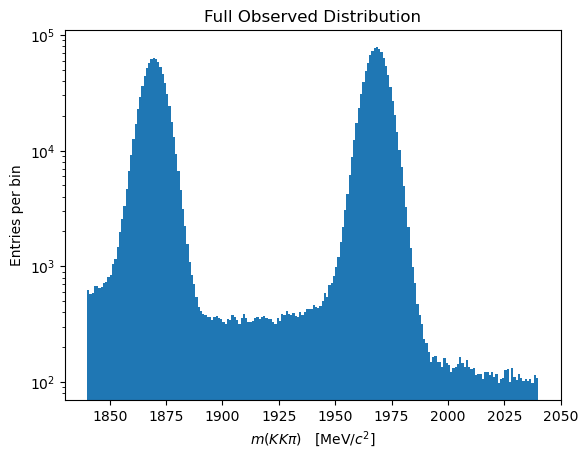

In [12]:
observed_full = sample()
plt.hist(observed_full,bins=200,range=(1840,2040))
plt.yscale('log')
plt.title('Full Observed Distribution')
plt.ylabel('Entries per bin')
plt.xlabel('$m(K K \pi)$   [MeV/$c^2$]')
plt.show()

## Crystal ball fit

Now we fit this distribution, using a Crystal ball and a Gaussian to model each peak

In [13]:
crys1_mass2 = fl.Param(1970)('mass')
crys1_mass1 = crys1_mass2 - fl.Param(100)('mass_diff')
crys1_Dp = (fl.Param.positive(400000)* fl.crystalball(fl.Param(0,5)(3.6), fl.Param(2)(0,np.inf), crys1_mass1, fl.Param.positive(5)('s1')) + 
            fl.Param.positive(400000)* fl.gaussian(crys1_mass1, fl.Param.positive(5)(0,np.inf)('s2')))
crys1_Ds = (fl.Param.positive(400000)* fl.crystalball(fl.Param(0,5)(1.8), fl.Param(2), crys1_mass2, fl.Param.positive(5)('s3')) + 
            fl.Param.positive(600000)* fl.gaussian(crys1_mass2, fl.Param.positive(5)('s4')))
crys1_tail = fl.Param.positive(40000) * fl.exponential(tau=fl.Param.positive(100)) % (fl.INPUT-1840)
crys1 = crys1_Dp+crys1_Ds+crys1_tail

In [14]:
crys1_fit = fl.fit(crys1 | fl.Cost.chi2(observed_full, 200, range=(1840,2040)), numba=False, grad=False); crys1_fit

/data/home/twarner/.local/lib/python3.8/site-packages/fitle/model.py:409: RuntimeWarning: invalid value encountered in power
  '__pow__': named(lambda a, b: a ** b, 'pow'),


<FitResult fval=302.097, success=True>
x0: 3.641e+05 ± 9.1e+03
mass: 1968 ± 0.0053
mass_diff: 98.68 ± 0.0086
s1: 4.253 ± 0.025
x4: 2.303 ± 0.055
x5: 1.415 ± 0.17
x6: 4.312e+05 ± 9.2e+03
s2: 5.791 ± 0.026
x8: 2.706e+06 ± 5.5e+04
s3: 4.472 ± 0.017
x10: 2.534 ± 0.0086
x11: 1.002 ± 4.6e-05
x12: 3.972e+05 ± 1e+04
s4: 6.102 ± 0.027
x14: 6.257e+04 ± 5.6e+02
x15: 133.6 ± 2.7

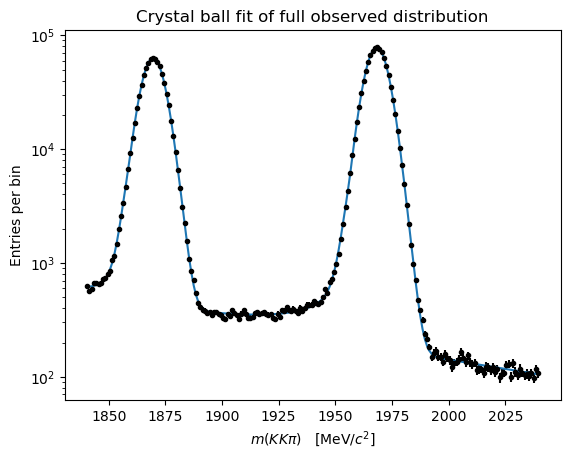

In [15]:
crys1_fit.plot_data()
crys1_fit.plot_fit()
plt.title('Crystal ball fit of full observed distribution')
plt.yscale('log')
plt.ylabel('Entries per bin')
plt.xlabel('$m(K K \pi)$   [MeV/$c^2$]')
plt.show()

## Convolution fit

Now we fit it with the convolutional method. Recall that the double Gaussian resolution is a good descriptor of nominal errors. Because of that, we fit each peak with two convolutions at the same mu

In [16]:
Dp_x, Dp_c = np.load("../data/mc/histograms/Dp.npy")
Ds_x, Ds_c = np.load("../data/mc/histograms/Ds.npy")

Dp_mother_mass = 1869.65
Ds_mother_mass = 1968.33

In [17]:
conv1_mass2 = fl.Param(1970)('mass')
conv1_mass1 = conv1_mass2 - fl.Param(100)('mass_diff')
conv1_Dp = fl.Param.positive(500000)* fl.convolve(Dp_x,Dp_c,Dp_mother_mass, conv1_mass1, fl.Param.positive(5))+fl.Param.positive(500000)* fl.convolve(Dp_x,Dp_c,Dp_mother_mass, conv1_mass1, fl.Param.positive(10))
conv1_Ds = fl.Param.positive(600000)* fl.convolve(Ds_x,Ds_c,Ds_mother_mass, conv1_mass2, fl.Param.positive(5))+fl.Param.positive(600000)* fl.convolve(Ds_x,Ds_c,Ds_mother_mass, conv1_mass2, fl.Param.positive(10))
conv1_tail = fl.Param.positive(40000) * fl.exponential(tau=fl.Param.positive(100)) % (fl.INPUT-1840)
conv1 = conv1_Dp+conv1_Ds+conv1_tail

In [18]:
conv1_fit = fl.fit(conv1 | fl.Cost.chi2(observed_full, 200, range=(1840,2040))); conv1_fit

Compiling model...
Compiling model...


<FitResult fval=214.592, success=True>
x0: 4.969e+05 ± 2.9e+04
x1: 4.443 ± 0.05
mass: 1968 ± 0.0053
mass_diff: 98.68 ± 0.008
x4: 2.944e+05 ± 2.9e+04
x5: 6.2 ± 0.098
x6: 7.264e+05 ± 2.6e+04
x7: 4.593 ± 0.034
x8: 2.701e+05 ± 2.6e+04
x9: 6.494 ± 0.098
x10: 6.021e+04 ± 5.9e+02
x11: 147.2 ± 2.8

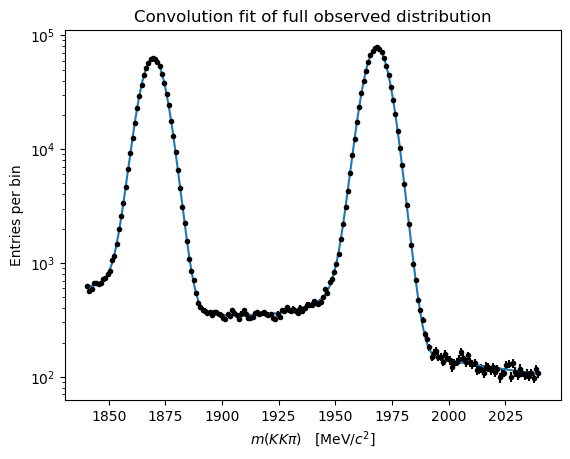

In [19]:
conv1_fit.plot_data()
conv1_fit.plot_fit()
plt.title('Convolution fit of full observed distribution')
plt.yscale('log')
plt.ylabel('Entries per bin')
plt.xlabel('$m(K K \pi)$   [MeV/$c^2$]')
plt.show()

In [21]:
prints = [
    ['Model', 'chi^2/ndf', 'mu1 (MeV)', 'Error', 'mu_diff (MeV)','Error'], 
    ['Truth', 'n/a', 1968.33, 0, 98.68, 0],
    ['Crystal ball', f"{crys1_fit.minimizer.fval/crys1_fit.dof():.2f}", f"{crys1_fit.values['mass']:.2f}", f"{crys1_fit.errors['mass']:.4f}",f"{crys1_fit.values['mass_diff']:.2f}",f"{crys1_fit.errors['mass_diff']:.4f}"],
    ['Conv', f"{conv1_fit.minimizer.fval/conv1_fit.dof():.2f}", f"{conv1_fit.values['mass']:.2f}", f"{conv1_fit.errors['mass']:.4f}",f"{conv1_fit.values['mass_diff']:.2f}",f"{conv1_fit.errors['mass_diff']:.4f}"]
]

[print("{0: <16}{1: <12}{2: <10}{3: <12}{4: <10}{5: <12}".format(*p)) for p in prints][0]

Model           chi^2/ndf   mu1 (MeV) Error       mu_diff (MeV)Error       
Truth           n/a         1968.33   0           98.68     0           
Crystal ball    1.65        1968.27   0.0053      98.68     0.0086      
Conv            1.15        1968.33   0.0053      98.68     0.0080      


We repeat this process to find that the Crystal ball is biased and has a non-Gaussian sampling distribution for mu1 and mu_diff, while the convolution is unbiased with approximately normal sampling distribution. In the paper, the sample function draws from the full distribution. This is done in monte_carlo.py